In [1]:
from main import import_data, hist_keys, scatter_grid
import pandas as pd
import matplotlib.pyplot as plt

data = import_data()

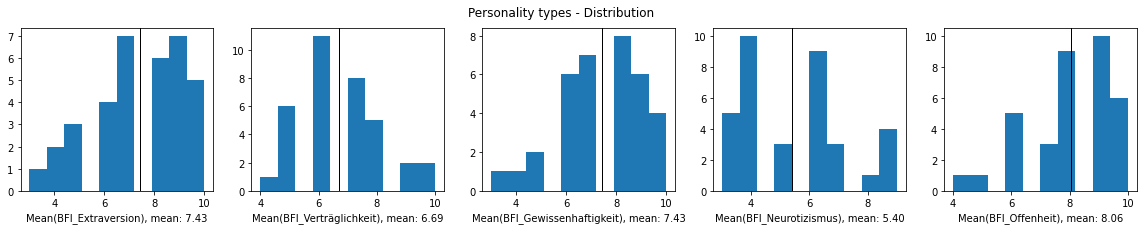

In [2]:
# Simple distribution overview of different personality types, this hasn't really been pursued any further in this project.
personalities = map(lambda x: "Mean(BFI_{0})".format(x), ["Extraversion", "Verträglichkeit", "Gewissenhaftigkeit", "Neurotizismus", "Offenheit"])
fig, a = hist_keys(data["participants"], list(personalities), suptitle="Personality types - Distribution")

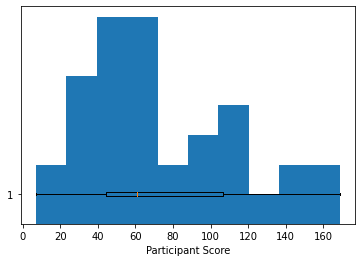

In [17]:
# Distribution of participant scores to get a feeling for usual score ranges.
# Mean score is just above 60 points

plt.xlabel("Participant Score")
plt.hist(data["participants"]["Score"])
plt.boxplot(data["participants"]["Score"], vert=False)
plt.show()

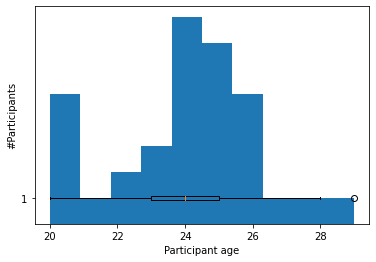

In [20]:
# Distribution of participant age
# one outlier (aged 60+) has been excluded

mean_alter = data["participants"]["Mean(Alter)"]
age_outlier = mean_alter < 60
plt.hist(mean_alter[age_outlier]) # remove single 60+ yo outlier
plt.xlabel("Participant age")
plt.ylabel("#Participants")
plt.boxplot(mean_alter[age_outlier], vert=False)
plt.show()

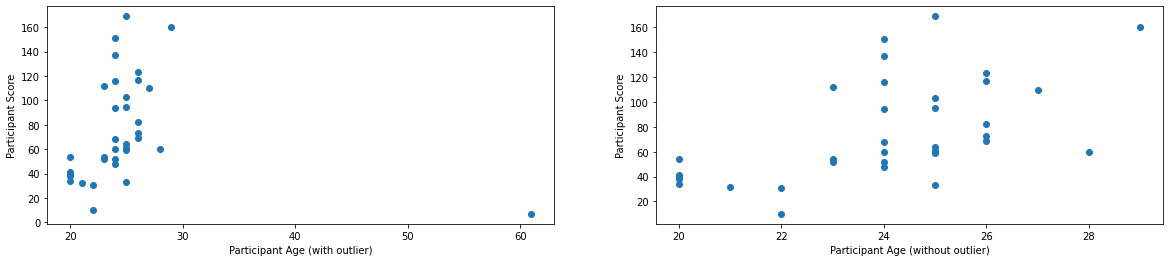

In [22]:
# Attempt to find a correlation between age and score,
# seems shakey at best, definitely needs more data to find any clear trends should they exist

fig, a = plt.subplots(1, 2, figsize=(20,4))

a[0].scatter(mean_alter, data["participants"]["Score"])
a[0].set(xlabel="Participant Age (with outlier)")
a[0].set(ylabel="Participant Score")

a[1].scatter(mean_alter[age_outlier], data["participants"]["Score"][age_outlier])
a[1].set(xlabel="Participant Age (without outlier)")
a[1].set(ylabel="Participant Score")

plt.show()

In [24]:
# Overview of participants previous experience with regular expressions and mean score in those levels.
# The low amount of users in all but the first group seems to exclude this
# metric from being worth investigating (without further data collection)
data["participants"].groupby("Mean(Vorwissen_regEx)")["Score"].agg(['mean', 'count'])

mean  count
Mean(Vorwissen_regEx)                  
1                      76.833333     30
2                      76.000000      2
3                      50.666667      3